<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hotel-Review-Data" data-toc-modified-id="Hotel-Review-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hotel Review Data</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Standard-Scaling" data-toc-modified-id="Standard-Scaling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Standard Scaling</a></span></li><li><span><a href="#Principle-Component-Analysis" data-toc-modified-id="Principle-Component-Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Principle Component Analysis</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K Nearest Neighbors</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-Optimization" data-toc-modified-id="Hyperparameter-Optimization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hyperparameter Optimization</a></span></li></ul></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-Optimization" data-toc-modified-id="Hyperparameter-Optimization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Hyperparameter Optimization</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li></ul></div>

# Hotel Review Data

This project uses the hotel review data vectorized in the previous phase to build descriptive and predictive models for hotel ratings.

In [1]:
# import frequently used libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import warnings
warnings.filterwarnings('ignore')

First, the data that is already split to train and test sets is loaded as follows:

In [2]:
train_df = pd.read_csv('train_dataframe.csv')

Below the high-level information of the data are shown:

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13651 entries, 0 to 13650
Columns: 2587 entries, Additional_Number_of_Scoring to Reviewer_Score
dtypes: float64(2587)
memory usage: 269.4 MB


The table below shows entries of the data set for top rows:

In [4]:
train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0,1.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [5]:
test_df = pd.read_csv('test_dataframe.csv')

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Columns: 2587 entries, Additional_Number_of_Scoring to Reviewer_Score
dtypes: float64(2587)
memory usage: 67.4 MB


In [7]:
# sample data for prototyping 

#train_df = train_df.sample(frac=0.1, random_state=42)
#test_df = test_df.sample(frac=0.1, random_state=42)

In [8]:
X_train = train_df.iloc[:,:-1]
X_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_worked,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [9]:
y_train = train_df.iloc[:,-1]
y_train.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Reviewer_Score, dtype: float64

In [10]:
X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

# Logistic Regression

Question 1.1

In [11]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42).fit(X_train, y_train)
print('Train Accuracy: ', lr.score(X_train, y_train))
print('Test Accuracy: ', lr.score(X_test, y_test))

Train Accuracy:  0.8272654018020658
Test Accuracy:  0.7896278933489599


In [12]:
# table of top 20 important words and coefficients for scaled data
coef_df = pd.DataFrame({'Feature':X_train.columns, 'Coefficient': lr.coef_[0]})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
word_df = coef_df[coef_df.Feature.str.contains('^[n,p]_')]
twenty_df = word_df.head(20).append(word_df.tail(20))
twenty_df

,Feature,Coefficient
2522,p_upgraded,2.059033
1719,p_amazing,2.037435
1978,p_fantastic,1.781315
1228,n_perfect,1.706760
2308,p_professional,1.698139
1972,p_fabulous,1.644790
2005,p_friendliness,1.591903
2271,p_perfect,1.561669
1955,p_excellent,1.513672
850,n_fault,1.504318


## Standard Scaling

In [13]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [14]:
# logistic regression with scaled data
# %%timeit
scale_lr = LogisticRegression(solver='lbfgs', random_state=42)
scale_lr.fit(X_train_scale, y_train)
print('Train Accuracy: ', scale_lr.score(X_train_scale, y_train))
print('Test Accuracy: ', scale_lr.score(X_test_scale, y_test))

Train Accuracy:  0.866676433960882
Test Accuracy:  0.7497802519777322


Logistic regression model achieved 75% accuracy on the test set.

In [15]:
# table of top 20 important words and coefficients for scaled data
coef_df = pd.DataFrame({'Feature':X_train.columns, 'Coefficeint': scale_lr.coef_[0]})
coef_df.sort_values(by='Coefficeint', ascending=False, inplace=True)
word_df = coef_df[coef_df.Feature.str.contains('^[n,p]_')]
twenty_df = word_df.head(20).append(word_df.tail(20))
twenty_df

,Feature,Coefficeint
2511,p_truly,0.362584
2114,p_kindly,0.329085
1719,p_amazing,0.310931
1955,p_excellent,0.292555
2213,p_movies,0.282158
2308,p_professional,0.276714
1078,n_loved,0.266326
2046,p_half,0.266018
2016,p_future,0.264394
2099,p_ironing,0.238970


## Principle Component Analysis

In [16]:
# principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_train_scale_pca = pca.fit_transform(X_train_scale)
X_test_scale_pca = pca.transform(X_test_scale)

In [17]:
# logistic regression with PCA
# %%timeit
pca_lr = LogisticRegression(solver='lbfgs', random_state=42).fit(X_train_scale_pca, y_train)
print('Train Accuracy: ', pca_lr.score(X_train_scale_pca, y_train))
print('Test Accuracy: ', pca_lr.score(X_test_scale_pca, y_test))

Train Accuracy:  0.8507069079188337
Test Accuracy:  0.762086141224729


The training accuracy has decreased because the model have less information to work with; however, test accuracy has improved because the discarded dimensions had more noise to introduce error than predictive information to increase accuracy. 

The computation time reduced because PCA reduced the amount of info to be processed. 

Even though PCA improved test accuracy, the coefficients of the model are not interpretable anymore.

# K Nearest Neighbors

In [18]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30).fit(X_train_scale_pca, y_train)
print(knn.score(X_train_scale_pca, y_train))
print(knn.score(X_test_scale_pca, y_test))

0.6177569408834518
0.5977146205684148


In [19]:
# sample data
remainder_sample_df = train_df.sample(frac=0.1, random_state=42)
test_sample_df = test_df.sample(frac=0.1, random_state=42)

# create features and target
X_remainder_sample = remainder_sample_df.iloc[:,:-1]
y_remainder_sample = remainder_sample_df.iloc[:,-1]
X_test_sample = test_sample_df.iloc[:,:-1]
y_test_sample = test_sample_df.iloc[:,-1]

In [20]:
# split data to training data and validation data
from sklearn.model_selection import train_test_split
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(X_remainder_sample, y_remainder_sample, test_size=0.25, random_state=42)

In [21]:
# scale data with standard scaler
scaler = StandardScaler()
X_train_sample_scale = scaler.fit_transform(X_train_sample)
X_valid_sample_scale = scaler.transform(X_valid_sample)
X_test_sample_scale = scaler.transform(X_test_sample)

In [22]:
# principle component analysis
pca = PCA(n_components=0.9)
X_train_sample_scale_pca = pca.fit_transform(X_train_sample_scale)
X_valid_sample_scale_pca = pca.transform(X_valid_sample_scale)
X_test_sample_scale_pca = pca.transform(X_test_sample_scale)

In [23]:
knn = KNeighborsClassifier(n_neighbors=30).fit(X_train_sample_scale_pca, y_train_sample)

In [24]:
print(knn.score(X_train_sample_scale_pca, y_train_sample))
print(knn.score(X_valid_sample_scale_pca, y_valid_sample))
print(knn.score(X_test_sample_scale_pca, y_test_sample))

0.581622678396872
0.543859649122807
0.5659824046920822


10% sample has reduced the computation time. Both train and test sets should get sampled in order to reduced because in nearest neighbors method for each test point each train points get evaluated to obtain the test score.

The advantage of reduced number of data points is that computation time has reduced; however, the disadvantage is that test accuracy has decreased as well. If number of data points in train set is reduced, the prediction accuracy is low because the classification result only relies on the majority vote of a few data points. On the other hand, if the data points are cut of test set, then the reliability of the test score is decreased because it is calculated based on only few instances. In the early prototyping stage, reducing number of data points saves a lot of time in trials after which the complete dataset can be employed to achieve maximum performance.

## Hyperparameter Optimization

4


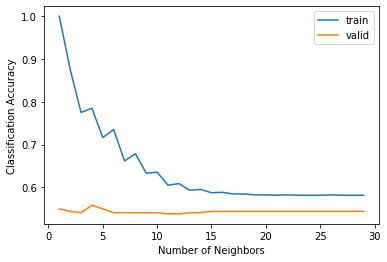

In [25]:
# hyperparameter optimization of nearest neighbors based on sample data 
train_accuracies = []
valid_accuracies = []

for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train_sample_scale_pca, y_train_sample)
    train_accuracies.append(knn.score(X_train_sample_scale_pca, y_train_sample))
    valid_accuracies.append(knn.score(X_valid_sample_scale_pca, y_valid_sample))    

plt.plot(range(1,30), train_accuracies)
plt.plot(range(1,30), valid_accuracies)
plt.legend(['train', 'valid'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Classification Accuracy')

print(range(1,30)[np.argmax(valid_accuracies)])

The problem with splitting the data to train and test after TF-IDF vectorization is that in this process many words existing in the test set appear as columns in train set affecting the test accuracy due to information leakage. 

# Decision Tree

In [26]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train_scale_pca, y_train)
print('Train Accuracy: ', dt.score(X_train_scale_pca, y_train))
print('Test Accuracy: ', dt.score(X_test_scale_pca, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.6434222092001172


## Hyperparameter Optimization

2


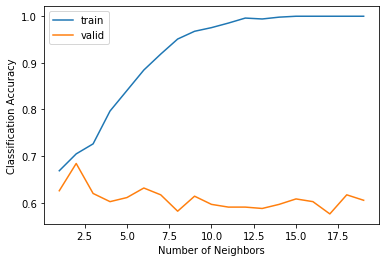

In [27]:
# hyperparameter optimization of decision tree
train_accuracies = []
valid_accuracies = []
param_range = range(1,20)
for n in param_range:
    dt = DecisionTreeClassifier(max_depth=n).fit(X_train_sample_scale_pca, y_train_sample)
    train_accuracies.append(dt.score(X_train_sample_scale_pca, y_train_sample))
    valid_accuracies.append(dt.score(X_valid_sample_scale_pca, y_valid_sample))    

plt.plot(param_range, train_accuracies)
plt.plot(param_range, valid_accuracies)
plt.legend(['train', 'valid'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Classification Accuracy')
print(range(1,30)[np.argmax(valid_accuracies)])

There are two great advantages of decision tree over nearest neighbors. First, decision tree provides better interpretations of features involved in the classification. Furthermore, decision trees have less prediction time than nearest neighbores because they get trained once and then only evaluated in time of prediction while for nearest neighbores every single training data points get checked upon predition

The validation set is used to optimize hyperparameters of the algorithms before it is tested on the test set as a measure of its performance in the real world. If the performance on the test and validation sets are close, the real world performance is most likely on the same level.

In [28]:
# decision tree
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier()
scores = cross_val_score(lr, X_remainder_sample, y_remainder_sample, cv = 5)
print(scores)

[0.75182482 0.71062271 0.73992674 0.76923077 0.74264706]


Best Accuracy: 0.6922980000534746


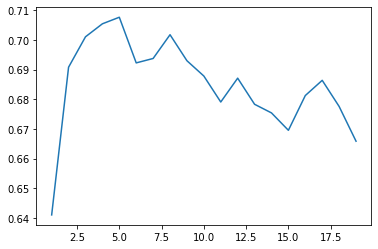

In [29]:
# hyperparameter optimization of decision tree with cross validation
from sklearn.model_selection import cross_val_score
cv_accuracies = []
for n in range(1,20):
    dt = DecisionTreeClassifier(max_depth=n)
    cv_accuracies.append((cross_val_score(dt, X_remainder_sample, y_remainder_sample, cv = 5)).mean())

plt.plot(param_range, cv_accuracies)
print('Best Accuracy:', cv_accuracies[range(1,20)[np.argmax(cv_accuracies)]])

## Model Evaluation 
The confusion matrix for the decision tree is calculated as follows:

In [30]:
# confusion matrix of decision tree
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(max_depth=range(1,20)[np.argmax(cv_accuracies)]).fit(X_train_sample_scale_pca, y_train_sample)
y_pred = dt.predict(X_test_sample_scale_pca)
confusion_matrix(y_test_sample, y_pred)

array([[ 69,  79],
       [ 42, 151]], dtype=int64)

The confusion matrix is 2-by-2 because there are two classes. The number of correct classifications are higher than incorrect classifications. There are more false positives than false negatives. The precision and recall are calculated as follows:

In [32]:
from sklearn.metrics import precision_score
precision_score(y_test_sample, y_pred)

0.6565217391304348

In [33]:
from sklearn.metrics import recall_score
recall_score(y_test_sample, y_pred)

0.7823834196891192

## Feature Engineering

Question 6.1

To improve accuracy of the model, an new feature is created. The new feature tries to capture sentiment of the user by contrasting the number words used in their positive and negative reviews. For instance, if a guest's positive review is longer than his or her negative review then he or she has a positive opinion of the hotel. The feature should also account for the personal differences in the reviewers. For instance, some people might be wordier than others in general and leave long reviews. This factor is considered by normalizing the difference with total number of words used in both positive and negative reviews

In [ ]:
# define new feature
X_train.Positive_Ratio = (X_train.Review_Total_Positive_Word_Counts - X_train.Review_Total_Negative_Word_Counts) / \
(X_train.Review_Total_Positive_Word_Counts + X_train.Review_Total_Negative_Word_Counts)
X_train.Positive_Ratio

In [ ]:
# add new feature to sample set
X_remainder_sample.Positive_Ratio = (X_remainder_sample.Review_Total_Positive_Word_Counts - X_remainder_sample.Review_Total_Negative_Word_Counts) / \
(X_remainder_sample.Review_Total_Positive_Word_Counts + X_remainder_sample.Review_Total_Negative_Word_Counts)
X_remainder_sample.Positive_Ratio

# scale data with standard scaler
scaler = StandardScaler()
X_remainder_sample_scale = scaler.fit_transform(X_remainder_sample)


'''
# principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2587 )
X_train_sample_scale_pca = pca.fit_transform(X_train_sample_scale)
X_valid_sample_scale_pca = pca.transform(X_valid_sample_scale)
X_test_sample_scale_pca = pca.transform(X_test_sample_scale)
'''

In [ ]:
# hyperparameter optimization of decision tree with cross validation with new feature
cv_accuracies = []
param_range = range(1,20)
for n in param_range:
    dt = DecisionTreeClassifier(max_depth=n)
    cv_accuracies.append((cross_val_score(dt, X_remainder_sample, y_remainder_sample, cv = 5)).mean())

plt.plot(param_range, cv_accuracies)

In [ ]:
print('Best max_depth:', range(1,20)[np.argmax(cv_accuracies)])
print('Best Accuracy:', max(cv_accuracies))

Best accuracy is achieved at a different value of the max depth. The accuracy of the optimzed model has slighlty improved as a result of the new info provided to the model.